<p style="color:#GG; background:#08D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left; margin-left:-450px">Project 1: Outil informatique</span><br>
<span style="font-size:42px; font-style:normal; text-align:center;font-family:sans-serif;color:white"><b>Analysis of COVID-19 Evolution Worldwide in 2020</b></span><br>
<span style="width:49%; display:inline-block; margin-right:-550px">Prepared by: BEN HADDADI, BELAIDI</span></p>


# **Project Overview: Analyzing the Evolution of COVID-19 Worldwide in 2020**

### **Objective**  
This project aims to comprehensively analyze the global progression of COVID-19 during the year 2020, using diverse datasets to uncover trends, correlations, and regional variations. By employing advanced analytical techniques, we aim to understand key factors influencing the pandemic's spread, mortality, recoveries, and testing dynamics.

---

### **Data Sources**  
We will utilize reliable, publicly available datasets from the following sources:
- [ECDC Data on Geographic Distribution of COVID-19 Cases](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)  
- [COVID-19 Data Repository](https://github.com/Rajesh42/Covid-19/blob/master/data.json)  
- [COVID-19 Vaccination Data](https://github.com/AndreasAvgou/Covid-19-Data-Analysis/blob/main/CovidVaccinations.xlsx)  
- [Our World in Data - COVID-19](https://raw.githubusercontent.com/owid/covid-19-data)  
- [HDX Novel Coronavirus Dataset](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?force_layout=desktop)  
- [Latitude and Longitude Dataset](https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state)  

---

### **Key Questions for Analysis**  

To guide the investigation, the following research questions will be addressed:  
1. **Global Trends**:  
   - Which countries experienced the highest number of reported COVID-19 cases and deaths?  
   - How does the growth in confirmed cases differ across continents?  

2. **Mortality and Recovery**:  
   - Which countries recorded the highest mortality rates relative to cases?  
   - What factors might explain disparities in recovery rates between countries and regions?  

3. **Testing and Diagnostics**:  
   - Which countries conducted the most COVID-19 tests?  
   - How does testing availability correlate with case detection and mortality rates?  

4. **Comparative Analysis**:  
   - How can the pandemic’s progression be compared between countries and continents?  
   - What insights can clustering countries based on testing, cases, and deaths provide?  

5. **Unanswered Areas**:  
   - How might the inclusion of vaccination data enhance our understanding of pandemic trends?  
   - What are the long-term impacts of early containment strategies versus delayed interventions?

---

### **Work Plan**  

To ensure a structured and systematic approach, the project will follow these steps:  

1. **Importing Packages and Datasets**:  
   - Import necessary Python libraries for data manipulation, visualization, and analysis.  
   - Load datasets from various sources and verify their integrity.  

2. **Data Preparation**:  
   - **Fetch**: Retrieve data from specified sources.  
   - **Clean**: Address missing values, handle duplicates, and standardize formats.  
   - **Structure**: Integrate and align datasets into a cohesive framework.  

3. **Model Development**:  
   - Define appropriate statistical and predictive models (e.g., correlation analysis, clustering, regression).  

4. **Analysis**:  
   - Apply models to examine relationships between variables, uncover trends, and answer research questions.  
   - Perform comparative studies between countries and regions.  

5. **Interpretation and Visualization**:  
   - Create insightful visualizations (e.g., time-series plots, geospatial maps, scatter plots).  
   - Derive actionable insights and summarize findings.  

---

This project aims not only to provide a data-driven understanding of COVID-19's evolution in 2020 but also to build a foundation for future research by identifying critical gaps and opportunities, such as the role of vaccination in mitigating the pandemic.


# Importing the Data

In [128]:
from SRC.tools import show, load, fetch
from itertools import product
import pandas as pa
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

## Tools for interactive maps
import folium

## Suppress unnecessary warnings
import warnings; warnings.filterwarnings('ignore')

## Create interactive widgets
import ipywidgets as widgets
from IPython.display import display

## Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



In [129]:
pa.reset_option('display.max_rows')

# Step 1: Data Collection and Cleaning
We will work with four datasets in different formats (CSV, JSON, XLSX) organized as follows:

### 1. First Dataset (CSV), named db1:
We will extract the following columns:
   * **deaths**: number of deaths,  
   * **country/Region**: names of countries.  

### 2. Second Dataset (JSON), named db2:
We will select the following columns:
   * **country**: the country,  
   * **recovered**: number of recovered individuals.  
     The country names may be abbreviated.  

### 3. Third Dataset (Excel), named db3:
We will extract the following columns:
   * **location**: the country,  
   * **total_tests**: number of individuals tested,  
   * **total_tests_per_thousand**: number of individuals tested as a percentage.  
     These details will also be grouped by location.

### 4. Fourth Dataset (CSV), named db4:
We will extract the following columns:
   * **country**: the country,  
   * **Total confirmed cases of COVID-19**: confirmed COVID-19 cases,  
   * **total_tests_per_thousand**: *(this column will be removed).*  

Afterward, we will merge all the previous datasets into a consolidated dataset, which will serve as the basis for our analysis.


# the first DB Csv Format


In [130]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# Read the CSV file into a DataFrame
db1 = pa.read_csv(url)
db1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


# The cleanning of the First DB

In [131]:
# extract columns : Province/State,Lat,Long,
nouveau_df1 = db1.drop(columns=['Province/State','Lat','Long'])


nouveau_df1.head(10)



,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
5,Antarctica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,146,146,146,146,146,146,146,146,146,146
7,Argentina,0,0,0,0,0,0,0,0,0,...,130463,130463,130463,130463,130463,130463,130472,130472,130472,130472
8,Armenia,0,0,0,0,0,0,0,0,0,...,8721,8721,8721,8721,8721,8721,8721,8721,8727,8727
9,Australia,0,0,0,0,0,0,0,0,0,...,224,224,228,228,228,228,228,228,228,228


## In this step, we changed the format and arrangement of our table to include a "date" column and a "Deaths" column with the corresponding values.

In [132]:
nouveau_df1 = pa.melt(nouveau_df1,id_vars = ['Country/Region'],var_name = 'date',value_name = 'Deaths')
nouveau_df1['date'] = pa.to_datetime(nouveau_df1['date'])
filtered_db1 = nouveau_df1[nouveau_df1['date'].dt.year == 2020]
filtered_db1

,Country/Region,date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
99700,West Bank and Gaza,2020-12-31,1400
99701,Winter Olympics 2022,2020-12-31,0
99702,Yemen,2020-12-31,610
99703,Zambia,2020-12-31,388


In [133]:
filtered_db1 = filtered_db1.drop_duplicates().dropna()  # Remove duplicates and NaNs

In [134]:
print(filtered_db1.shape)

(83497, 3)


In [135]:
print(filtered_db1.isnull().sum())  # check number of NaN per column

Country/Region    0
date              0
Deaths            0
dtype: int64


In [136]:
print(filtered_db1.duplicated().sum())  # check number of duplicates

0


### The dataset has been carefully cleaned of outliers and duplicates. We will now proceed to combine columns based on countries using the `groupby` function.


In [137]:
#  here we did a group by the country and show the sum of deaths for each country
final_data = (
    filtered_db1.groupby(['Country/Region'])
    .agg({'Deaths': 'sum'})
    .reset_index()
)

final_data.head(10)

,Country/Region,Deaths
0,Afghanistan,296447
1,Albania,88375
2,Algeria,377806
3,Andorra,15492
4,Angola,36818
5,Antarctica,0
6,Antigua and Barbuda,864
7,Argentina,3802826
8,Armenia,248551
9,Australia,132779


In [138]:
# Rename column 'countriesAndTerritories' to 'Country' so we can join our tables on the column Country
final_data.rename(columns={'Country/Region':'Country'}, inplace=True)
final_data.head(10)


,Country,Deaths
0,Afghanistan,296447
1,Albania,88375
2,Algeria,377806
3,Andorra,15492
4,Angola,36818
5,Antarctica,0
6,Antigua and Barbuda,864
7,Argentina,3802826
8,Armenia,248551
9,Australia,132779


In [139]:
print(final_data.isnull().sum())  # recheck number of NaNs per column
print(final_data.duplicated().sum())  # recheck number of duplicate

Country    0
Deaths     0
dtype: int64
0


# The second DB Json Format

In [140]:
# read Json data
db2 = pa.read_json('data/time_series_covid19_recovered_global.json')
db2_flattened = db2
db2_flattened

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,,Winter Olympics 2022,39.9042,116.4074,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# The cleanning of the second DB


In [141]:
#extract columns : country 	recovered
nouveau_df2 = db2_flattened.drop(columns=['Province/State','Lat','Long'])
nouveau_df2


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#convert date in rows to columns
nouveau_df2 = pa.melt(nouveau_df2,id_vars = ['Country/Region'],var_name = 'date',value_name = 'recovered')
nouveau_df2

,Country/Region,date,recovered
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
313177,West Bank and Gaza,3/9/23,0
313178,Winter Olympics 2022,3/9/23,0
313179,Yemen,3/9/23,0
313180,Zambia,3/9/23,0


In [143]:
#here we did a filter to get the rows with in only the year 2020
nouveau_df2['date'] = pa.to_datetime(nouveau_df2['date'])
filtered_db2 = nouveau_df2[nouveau_df2['date'].dt.year == 2020]
filtered_db2

,Country/Region,date,recovered
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
94525,West Bank and Gaza,2020-12-31,117183
94526,Winter Olympics 2022,2020-12-31,0
94527,Yemen,2020-12-31,1394
94528,Zambia,2020-12-31,18660


In [144]:
# combines recovered with country
nouveau_df2 = filtered_db2.drop_duplicates().dropna() # Remove duplicates

final_data_js = (
    nouveau_df2.groupby(['Country/Region'])
    .agg({'recovered': 'sum'})
    .reset_index()
)
# Afficher les 10 premières lignes
final_data_js

,Country/Region,recovered
0,Afghanistan,5998314
1,Albania,1999772
2,Algeria,7142836
3,Andorra,553171
4,Angola,649173
...,...,...
196,West Bank and Gaza,6750134
197,Winter Olympics 2022,0
198,Yemen,220558
199,Zambia,2229469


In [145]:
# Rename column 'Country/Region' to 'Country' so we can join our tables on the column Country
final_data_js.rename(columns={'Country/Region':'Country'}, inplace=True)
final_data_js


,Country,recovered
0,Afghanistan,5998314
1,Albania,1999772
2,Algeria,7142836
3,Andorra,553171
4,Angola,649173
...,...,...
196,West Bank and Gaza,6750134
197,Winter Olympics 2022,0
198,Yemen,220558
199,Zambia,2229469


# the third DB Excel Format


In [146]:
#read dataset3
db3 = pa.read_excel('data/CovidVaccinations.xlsx')
db3[db3['total_tests_per_thousand'].notna()]
#here we did a filter to get the rows with in only the year 2020
db3['date'] = pa.to_datetime(db3['date'])
filtered_db3 = db3[db3['date'].dt.year == 2020]
filtered_db3

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155468,ZWE,Africa,Zimbabwe,2020-12-27,1015.0,208791.0,13.834,0.067,1414.0,0.094,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155469,ZWE,Africa,Zimbabwe,2020-12-28,951.0,209742.0,13.897,0.063,1378.0,0.091,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155470,ZWE,Africa,Zimbabwe,2020-12-29,2373.0,212115.0,14.055,0.157,1513.0,0.100,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155471,ZWE,Africa,Zimbabwe,2020-12-30,2462.0,214577.0,14.218,0.163,1651.0,0.109,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [147]:
print(filtered_db3.columns)

Index(['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
  

# the cleanning of the third DB

In [148]:
# here we dropped the columns we don't need
nouveau_df3 = filtered_db3.drop(columns=['iso_code', 'continent', 'date', 'new_tests',
       'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'])

In [149]:
nouveau_df3

,location,total_tests,total_tests_per_thousand
0,Afghanistan,NaN,NaN
1,Afghanistan,NaN,NaN
2,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
4,Afghanistan,NaN,NaN
...,...,...,...
155468,Zimbabwe,208791.0,13.834
155469,Zimbabwe,209742.0,13.897
155470,Zimbabwe,212115.0,14.055
155471,Zimbabwe,214577.0,14.218


In [150]:
nouveau_df3= nouveau_df3.drop_duplicates()  # delete the duplicate
nouveau_df3= nouveau_df3.dropna() #delete the gap and nans
# Rename column 'location' to 'Country' so we can join our tables on the column Country
nouveau_df3.rename(columns={'location': 'Country'}, inplace=True)
nouveau_df3

,Country,total_tests,total_tests_per_thousand
1403,Albania,8.0,0.003
1404,Albania,13.0,0.005
1405,Albania,17.0,0.006
1406,Albania,18.0,0.006
1407,Albania,26.0,0.009
...,...,...,...
155468,Zimbabwe,208791.0,13.834
155469,Zimbabwe,209742.0,13.897
155470,Zimbabwe,212115.0,14.055
155471,Zimbabwe,214577.0,14.218


### Here we combined the country, total_tests and total_tests_per_thousand columns, calculating the sum for each metric.

In [151]:
aggregated_data = (
    nouveau_df3.groupby(['Country'])
    .agg({'total_tests': 'sum', 'total_tests_per_thousand': 'sum'})
    .reset_index()
)
aggregated_data

,Country,total_tests,total_tests_per_thousand
0,Albania,1.982720e+07,6901.385
1,Andorra,2.753710e+05,3559.880
2,Argentina,4.793692e+08,10511.139
3,Armenia,2.787384e+07,9391.054
4,Australia,1.063656e+09,41245.804
...,...,...,...
108,United States,2.543281e+10,76394.280
109,Uruguay,5.248980e+07,15060.978
110,Vietnam,3.898035e+07,397.073
111,Zambia,4.239486e+07,2240.667


# The fourth database Csv Format


In [152]:
db4 = pa.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/archived/ecdc/COVID-2019%20-%20ECDC%20(2020).csv')
db4.dropna().drop_duplicates()

,Country,Year,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Total confirmed deaths due to COVID-19,Daily new confirmed cases of COVID-19 per million people,Daily new confirmed deaths due to COVID-19 per million people,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people,...,Weekly case growth (%),Weekly death growth (%),Biweekly cases,Biweekly deaths,Biweekly case growth (%),Biweekly death growth (%),Weekly cases per million people,Weekly deaths per million people,Biweekly cases per million people,Biweekly deaths per million people
98,Afghanistan,77,38.0,0.0,337.0,7.0,0.976,0.000,8.657,0.180,...,94.059406,0.000000,297.0,6.0,725.000000,500.000000,5.035,0.077,7.629,0.154
99,Afghanistan,78,30.0,4.0,367.0,11.0,0.771,0.103,9.428,0.283,...,62.096774,133.333333,325.0,10.0,828.571429,900.000000,5.163,0.180,8.349,0.257
100,Afghanistan,79,56.0,3.0,423.0,14.0,1.439,0.077,10.866,0.360,...,97.435897,233.333333,348.0,13.0,411.764706,1200.000000,5.934,0.257,8.940,0.334
101,Afghanistan,80,61.0,1.0,484.0,15.0,1.567,0.026,12.433,0.385,...,55.625000,266.666667,409.0,14.0,501.470588,1300.000000,6.396,0.283,10.506,0.360
102,Afghanistan,81,37.0,0.0,521.0,15.0,0.950,0.000,13.384,0.385,...,98.611111,450.000000,430.0,13.0,411.904762,550.000000,7.347,0.283,11.046,0.334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64530,Zimbabwe,309,90.0,1.0,9398.0,274.0,6.055,0.067,632.312,18.435,...,35.223881,180.000000,788.0,19.0,167.118644,46.153846,30.479,0.942,53.018,1.278
64531,Zimbabwe,310,110.0,0.0,9508.0,274.0,7.401,0.000,639.712,18.435,...,67.834395,116.666667,841.0,19.0,142.363112,46.153846,35.457,0.875,56.584,1.278
64532,Zimbabwe,311,115.0,0.0,9623.0,274.0,7.737,0.000,647.450,18.435,...,64.857143,-10.000000,927.0,19.0,167.146974,46.153846,38.821,0.606,62.370,1.278
64533,Zimbabwe,312,91.0,1.0,9714.0,275.0,6.123,0.067,653.572,18.502,...,67.323944,25.000000,949.0,18.0,135.483871,20.000000,39.965,0.673,63.850,1.211


# the cleaning of the fourth DB

In [153]:
print(db4.columns) #Show columns of db4 database

Index(['Country', 'Year', 'Daily new confirmed cases of COVID-19',
       'Daily new confirmed deaths due to COVID-19',
       'Total confirmed cases of COVID-19',
       'Total confirmed deaths due to COVID-19',
       'Daily new confirmed cases of COVID-19 per million people',
       'Daily new confirmed deaths due to COVID-19 per million people',
       'Total confirmed cases of COVID-19 per million people',
       'Total confirmed deaths due to COVID-19 per million people',
       'Days since the total confirmed cases of COVID-19 reached 100',
       'Days since the total confirmed deaths of COVID-19 reached 5',
       'Days since the total confirmed cases of COVID-19 per million people reached 1',
       'Days since the total confirmed deaths of COVID-19 per million people reached 0.1',
       'Days since 30 daily new confirmed cases recorded',
       'Days since 50 daily new confirmed cases recorded',
       'Days since 10 daily new confirmed deaths recorded',
       'Days since 

In [154]:
#extract the columns we need
nouveau_df4 = db4.drop(columns=['Year', 'Daily new confirmed cases of COVID-19',
       'Daily new confirmed deaths due to COVID-19',
       'Total confirmed deaths due to COVID-19',
       'Daily new confirmed cases of COVID-19 per million people',
       'Daily new confirmed deaths due to COVID-19 per million people',
       'Total confirmed cases of COVID-19 per million people',
       'Total confirmed deaths due to COVID-19 per million people',
       'Days since the total confirmed cases of COVID-19 reached 100',
       'Days since the total confirmed deaths of COVID-19 reached 5',
       'Days since the total confirmed cases of COVID-19 per million people reached 1',
       'Days since the total confirmed deaths of COVID-19 per million people reached 0.1',
       'Days since 30 daily new confirmed cases recorded',
       'Days since 50 daily new confirmed cases recorded',
       'Days since 10 daily new confirmed deaths recorded',
       'Days since 5 daily new confirmed deaths recorded',
       'Days since 3 daily new confirmed deaths recorded',
       'Days since daily new confirmed cases of COVID-19 (rolling 7-day average, right-aligned) reached 30',
       'Days since daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned) reached 5',
       'Days since daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned) reached 1',
       'Days since daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned) reached 0.1',
       'Days since daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned) reached 0.01',
       'Daily new confirmed cases of COVID-19 (rolling 3-day average, right-aligned)',
       'Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)',
       'Daily new confirmed deaths due to COVID-19 (rolling 3-day average, right-aligned)',
       'Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)',
       'Daily new confirmed cases of COVID-19 per million people (rolling 3-day average, right-aligned)',
       'Daily new confirmed deaths due to COVID-19 per million people (rolling 3-day average, right-aligned)',
       'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)',
       'Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)',
       'Case fatality rate of COVID-19 (%)',
       'Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases)',
       'Case fatality rate of COVID-19 (%) (Short-term)',
       'Days since the total confirmed cases of COVID-19 reached 100 (with population ≥ 5M)',
       'Has population ≥ 5M AND had ≥100 cases ≥21 days ago AND has testing data',
       'Doubling days of total confirmed cases (3 day period)',
       'Doubling days of total confirmed cases (7 day period)',
       'Doubling days of total confirmed deaths (3 day period)',
       'Doubling days of total confirmed deaths (7 day period)',
       'Weekly cases', 'Weekly deaths', 'Biweekly cases', 'Biweekly deaths',
       'Biweekly case growth (%)', 'Biweekly death growth (%)',
       'Weekly cases per million people', 'Weekly deaths per million people',
       'Biweekly cases per million people',
       'Biweekly deaths per million people'])

In [155]:
nouveau_df4= nouveau_df4.drop_duplicates()  # delete the duplicate
nouveau_df4= nouveau_df4.dropna() #delete the gap and nans
nouveau_df4

,Country,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%)
91,Afghanistan,141.0,431.578947,200.000000
92,Afghanistan,166.0,520.000000,200.000000
93,Afghanistan,192.0,120.754717,200.000000
94,Afghanistan,235.0,201.886792,200.000000
95,Afghanistan,235.0,114.925373,0.000000
...,...,...,...,...
64530,Zimbabwe,9398.0,35.223881,180.000000
64531,Zimbabwe,9508.0,67.834395,116.666667
64532,Zimbabwe,9623.0,64.857143,-10.000000
64533,Zimbabwe,9714.0,67.323944,25.000000


In [156]:
#  conserver les colonnes supplémentaires (`cases`, `deaths`, etc.) avec countriesAndTerritories
final_data4 = (
    nouveau_df4.groupby(['Country'])
    .agg({'Total confirmed cases of COVID-19': 'sum', 'Weekly case growth (%)': 'sum' ,'Weekly death growth (%)':'sum'})
    .reset_index()
)
# Afficher les 10 premières lignes
final_data4.head(10)

,Country,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%)
0,Afghanistan,6874418.0,6572.747274,7664.513326
1,Africa,213186714.0,7810.988734,9944.833894
2,Albania,2087538.0,4602.831670,8040.837016
3,Algeria,7453017.0,8013.277719,6994.092765
4,Andorra,203844.0,-2041.471758,-1897.983683
5,Angola,774160.0,4405.497767,3331.533470
6,Antigua and Barbuda,841.0,-310.000000,-1000.000000
7,Argentina,97788865.0,8900.176490,10121.638111
8,Armenia,9741826.0,3828.715320,6117.845335
9,Aruba,374743.0,-1081.544713,2285.952381


In [157]:
# Rename column 'countriesAndTerritories' to 'country'
final_data4.rename(columns={'country': 'Country'}, inplace=True)
final_data4.head(10)

,Country,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%)
0,Afghanistan,6874418.0,6572.747274,7664.513326
1,Africa,213186714.0,7810.988734,9944.833894
2,Albania,2087538.0,4602.831670,8040.837016
3,Algeria,7453017.0,8013.277719,6994.092765
4,Andorra,203844.0,-2041.471758,-1897.983683
5,Angola,774160.0,4405.497767,3331.533470
6,Antigua and Barbuda,841.0,-310.000000,-1000.000000
7,Argentina,97788865.0,8900.176490,10121.638111
8,Armenia,9741826.0,3828.715320,6117.845335
9,Aruba,374743.0,-1081.544713,2285.952381


# The merge between the previous Datas to get the final data

In [158]:
# Merge the two Csv tables
merged_table = pa.merge(final_data,final_data4, on='Country',how='outer')

# Merge with the JSON table
merged_table = pa.merge(merged_table, final_data_js, on='Country', how='outer')

# Merge with the Excel table
merged_table = pa.merge(merged_table, aggregated_data, on='Country', how='outer')
pa.set_option('display.max_rows',None)
merged_table1 = merged_table.drop_duplicates().dropna()

merged_table1

,Country,Deaths,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%),recovered,total_tests,total_tests_per_thousand
2,Albania,88375.0,2087538.0,4602.831670,8040.837016,1999772.0,1.982720e+07,6901.385
4,Andorra,15492.0,203844.0,-2041.471758,-1897.983683,553171.0,2.753710e+05,3559.880
8,Argentina,3802826.0,97788865.0,8900.176490,10121.638111,121379656.0,4.793692e+08,10511.139
9,Armenia,248551.0,9741826.0,3828.715320,6117.845335,11132064.0,2.787384e+07,9391.054
13,Australia,132779.0,3365630.0,7684.011295,5945.270134,3794370.0,1.063656e+09,41245.804
14,Austria,438345.0,11427773.0,5932.170997,22432.640129,17689572.0,3.647439e+08,40334.075
17,Bahrain,47269.0,9860115.0,1660.725521,3023.602871,11961386.0,2.631992e+08,150546.239
18,Bangladesh,968739.0,52580326.0,16714.942228,10333.060492,49731029.0,3.843345e+08,2311.046
20,Belarus,172608.0,15008438.0,4582.278811,2321.461540,17134306.0,1.148356e+08,12161.104
21,Belgium,2931202.0,33921462.0,5318.599662,20774.675673,3797810.0,7.459653e+08,64128.600


In [159]:
merged_table1.columns

Index(['Country', 'Deaths', 'Total confirmed cases of COVID-19',
       'Weekly case growth (%)', 'Weekly death growth (%)', 'recovered',
       'total_tests', 'total_tests_per_thousand'],
      dtype='object')

### here we added another  csv table with the coordinates of the countries to show the stats on the map 

In [160]:
country_coords = pa.read_csv('data/world_country_and_usa_states_latitude_and_longitude_values.csv')

#removing the unnecessary columns
country_coords = country_coords.drop(columns=['country_code', 'usa_state_code','usa_state_latitude','usa_state_longitude','usa_state'])

# rename the columns for an easy manipulation
country_coords.rename(columns={'country': 'Country','latitude':'lat','longitude':'long'}, inplace=True)
country_coords

,lat,long,Country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
5,41.153332,20.168331,Albania
6,40.069099,45.038189,Armenia
7,12.226079,-69.060087,Netherlands Antilles
8,-11.202692,17.873887,Angola
9,-75.250973,-0.071389,Antarctica


In [161]:
#here we merged the table with country coordinates with our final table

final_table = merged_table1.merge(country_coords, on='Country', how='left')
final_table

,Country,Deaths,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%),recovered,total_tests,total_tests_per_thousand,lat,long
0,Albania,88375.0,2087538.0,4602.831670,8040.837016,1999772.0,1.982720e+07,6901.385,41.153332,20.168331
1,Andorra,15492.0,203844.0,-2041.471758,-1897.983683,553171.0,2.753710e+05,3559.880,42.546245,1.601554
2,Argentina,3802826.0,97788865.0,8900.176490,10121.638111,121379656.0,4.793692e+08,10511.139,-38.416097,-63.616672
3,Armenia,248551.0,9741826.0,3828.715320,6117.845335,11132064.0,2.787384e+07,9391.054,40.069099,45.038189
4,Australia,132779.0,3365630.0,7684.011295,5945.270134,3794370.0,1.063656e+09,41245.804,-25.274398,133.775136
5,Austria,438345.0,11427773.0,5932.170997,22432.640129,17689572.0,3.647439e+08,40334.075,47.516231,14.550072
6,Bahrain,47269.0,9860115.0,1660.725521,3023.602871,11961386.0,2.631992e+08,150546.239,25.930414,50.637772
7,Bangladesh,968739.0,52580326.0,16714.942228,10333.060492,49731029.0,3.843345e+08,2311.046,23.684994,90.356331
8,Belarus,172608.0,15008438.0,4582.278811,2321.461540,17134306.0,1.148356e+08,12161.104,53.709807,27.953389
9,Belgium,2931202.0,33921462.0,5318.599662,20774.675673,3797810.0,7.459653e+08,64128.600,50.503887,4.469936


In [162]:
print(final_table.columns)

Index(['Country', 'Deaths', 'Total confirmed cases of COVID-19',
       'Weekly case growth (%)', 'Weekly death growth (%)', 'recovered',
       'total_tests', 'total_tests_per_thousand', 'lat', 'long'],
      dtype='object')


# Data Visualization

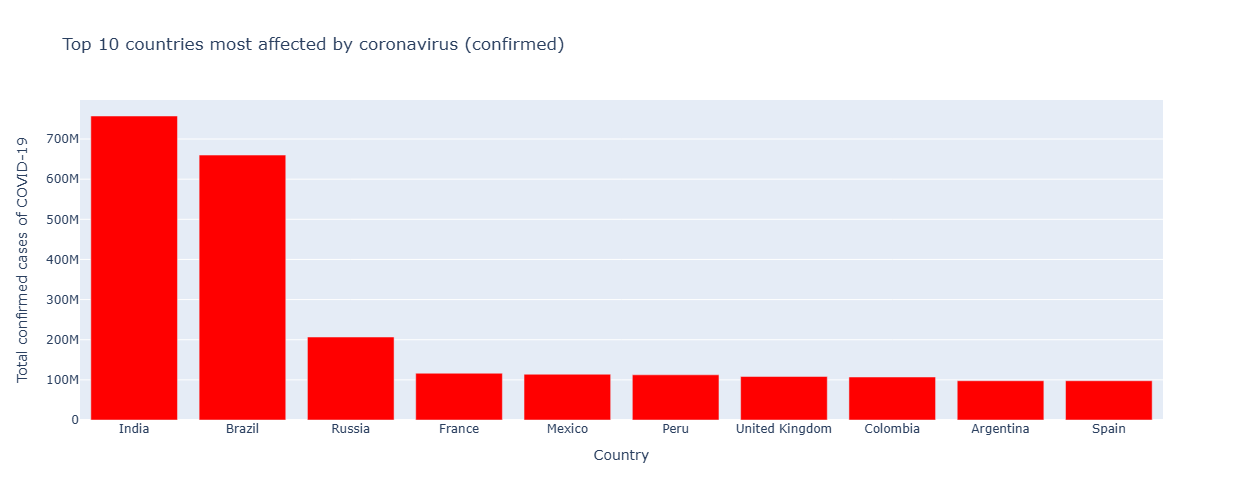

In [163]:
etat_confirme = final_table.sort_values('Total confirmed cases of COVID-19',ascending=False)
etat_confirme['Country']

px.bar(
   etat_confirme.head(10),
   x= 'Country',
   y= 'Total confirmed cases of COVID-19',
  title='Top 10 countries most affected by coronavirus (confirmed)',
  color_discrete_sequence=['red'],
  height=500,
  width=800
)

In [164]:
etat_death = final_table.sort_values('Deaths',ascending=False)
etat_death['Country']
px.bar(
   etat_death.head(10),
   x= 'Country',
   y= 'Deaths',
  title='Top 10 Countries Most Affected by Coronavirus (Deaths)',
  color_discrete_sequence=['red'],
  height=500,
  width=800
)

# Time-Series Analysis

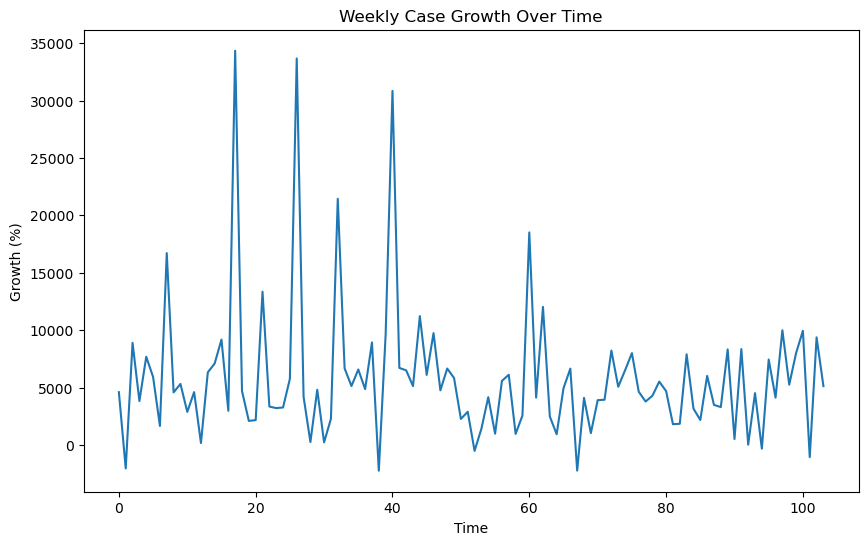

In [165]:
# Plotting weekly case growth vs. time
final_table['Weekly case growth (%)'].plot(
    kind='line', 
    title='Weekly Case Growth Over Time',
    ylabel='Growth (%)', 
    xlabel='Time', 
    figsize=(10, 6)
)
plt.show()


The resulting graph shows the weekly growth of COVID-19 cases over time. The horizontal axis represents time, while the vertical axis shows the percentage of growth in cases. There are significant fluctuations, with periods of rapid growth marked by spikes, suggesting episodic spread of the virus. Periods of decline indicate temporary drops in the number of new cases. Overall, the graph illustrates the volatility and variation in COVID-19 case dynamics over a given period.v

> # Correlation Analysis
### Understand relationships between variables like total_tests, Deaths, and Weekly death growth (%).

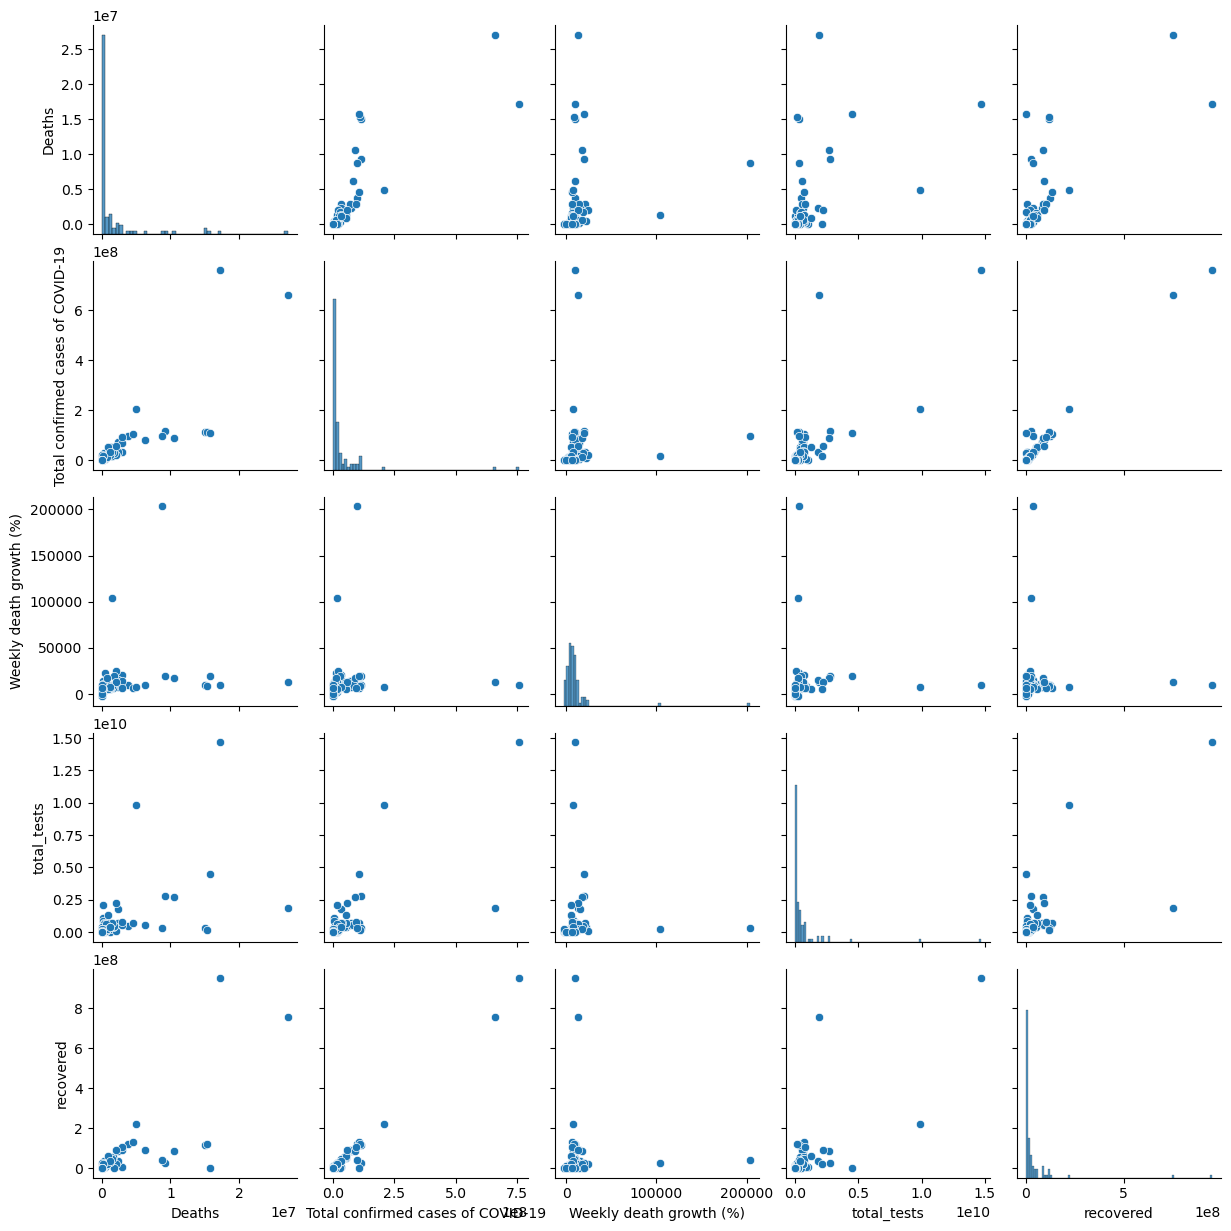

In [166]:
# Pairplot for correlations
sb.pairplot(
    final_table[['Deaths', 'Total confirmed cases of COVID-19', 
                 'Weekly death growth (%)', 'total_tests', 'recovered']].dropna()
)
plt.show()


The generated pairplot illustrates the relationships between five variables related to COVID-19 data: **deaths**, **total confirmed cases**, **weekly growth in deaths (%)**, **total tests**, and **recovered**. Each subplot shows the correlation between two of these variables, while the diagonal plots show the distribution of each variable.

This visualization allows us to examine potential correlations and patterns between different COVID-19 metrics, which can be useful for understanding the spread and impact of the virus as well as the effectiveness of testing and recovery efforts. By observing these plots, it is possible to detect important trends and relationships, which is essential for further analysis of pandemic data.

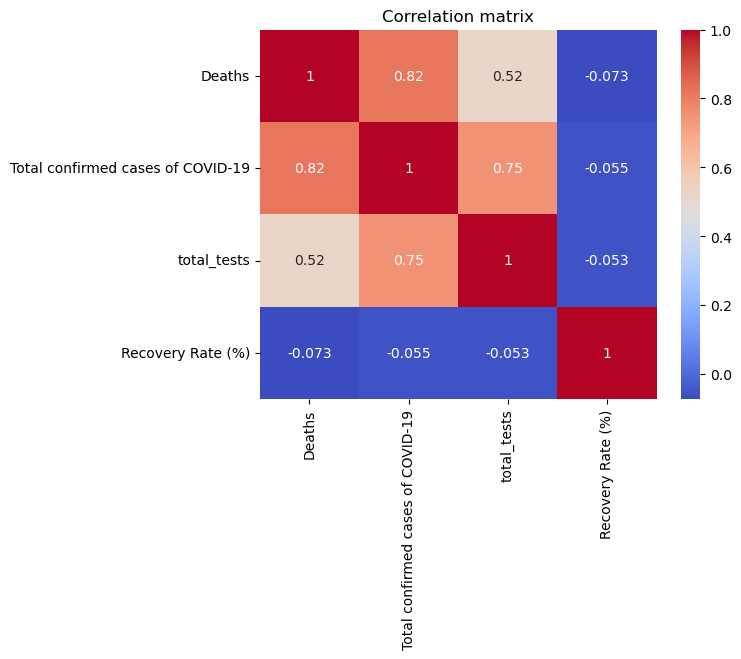

In [167]:
final_table['Recovery Rate (%)'] = (final_table['recovered'] / final_table['Total confirmed cases of COVID-19']) * 100
# Corrélation entre les variables
correlation_matrix = final_table[['Deaths', 'Total confirmed cases of COVID-19',
                                  'total_tests', 'Recovery Rate (%)']].corr()

# Heatmap des corrélations
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


### Interpretation : 
The high correlation between deaths and confirmed cases shows that more cases lead to more deaths. The positive relationship between testing and confirmed cases suggests that mass testing reveals more cases. Finally, the low correlation with recovery rate indicates that other factors such as medical care influence this rate.

# Testing Analysis: Tests per Thousand
### Identify countries with the highest testing rates.

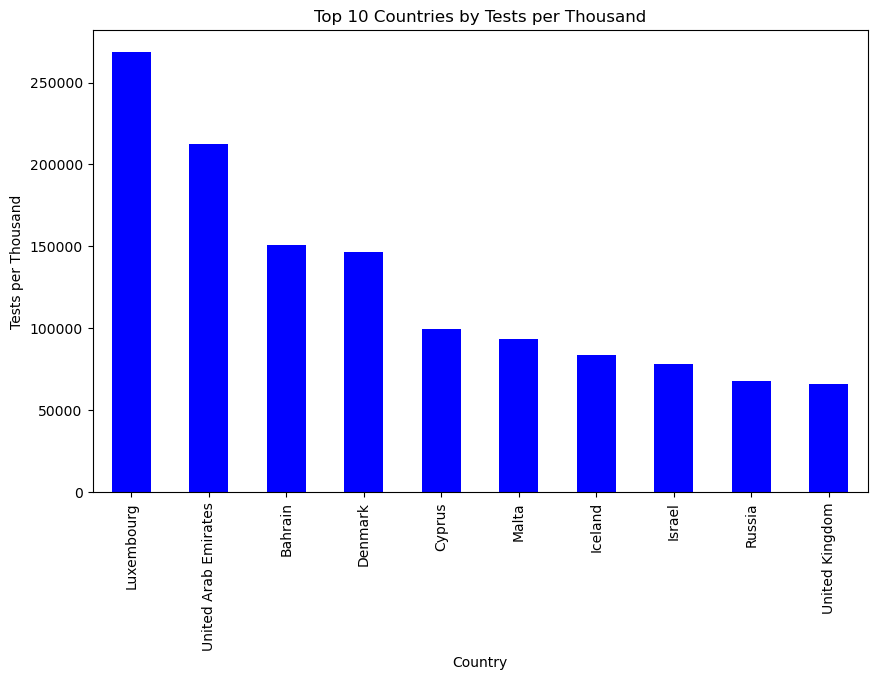

In [168]:
# Top 10 countries by tests per thousand
top_tests = final_table[['Country', 'total_tests_per_thousand']].sort_values(
    by='total_tests_per_thousand', ascending=False
).head(10)

# Bar Plot
top_tests.plot(
    kind='bar', 
    x='Country', 
    y='total_tests_per_thousand', 
    title='Top 10 Countries by Tests per Thousand',
    legend=False, 
    color='blue', 
    figsize=(10, 6)
)
plt.ylabel('Tests per Thousand')
plt.show()


## Insights on Recovery Trends Across Countries

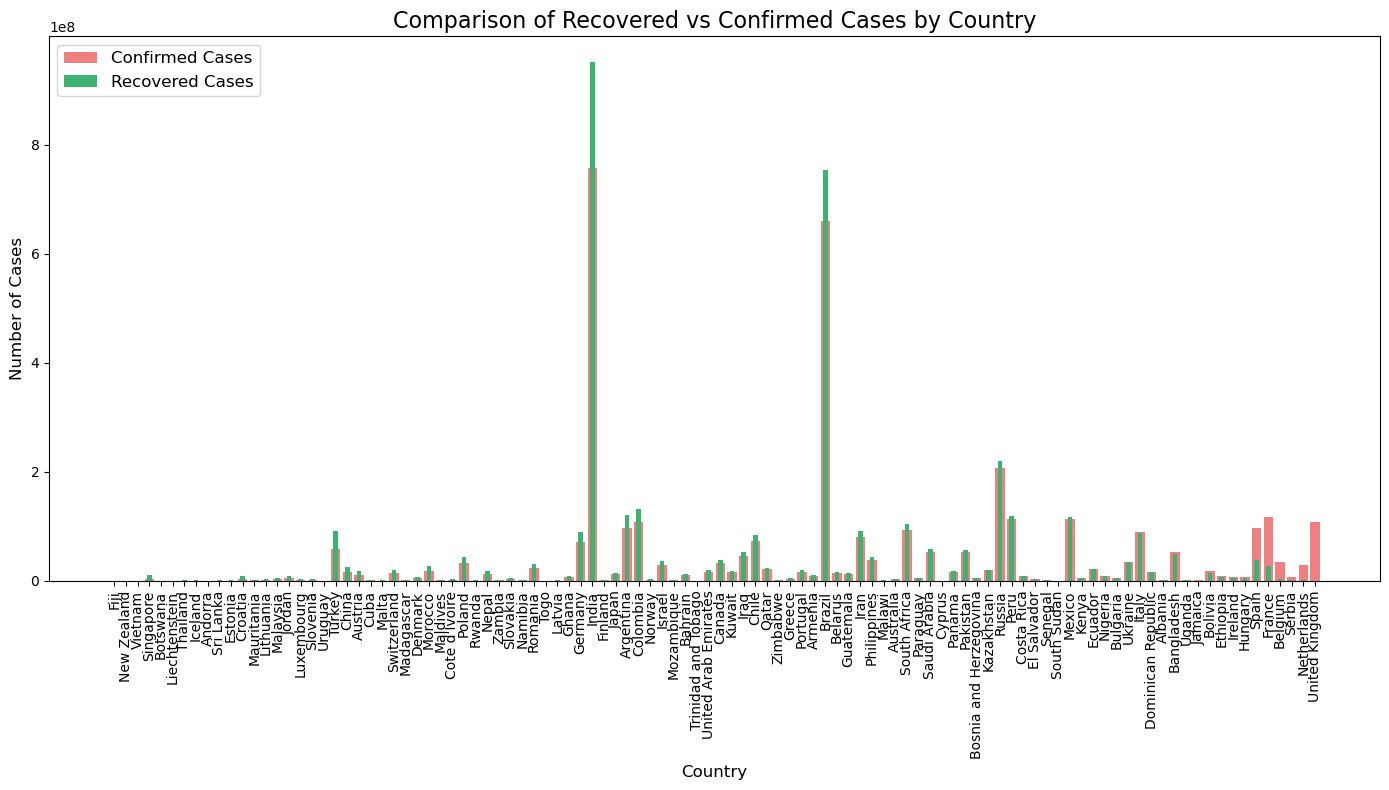

In [169]:
# Calculate recovery rate
final_table['Recovery Rate (%)'] = (final_table['recovered'] / final_table['Total confirmed cases of COVID-19']) * 100

# Sort by recovery rate for a cleaner plot
sorted_table = final_table.sort_values('Recovery Rate (%)', ascending=False)

# Set up the data for the plot
countries = sorted_table['Country']
confirmed_cases = sorted_table['Total confirmed cases of COVID-19']
recovered_cases = sorted_table['recovered']

# Plot
plt.figure(figsize=(14, 8))
width = 0.4
indices = np.arange(len(countries))

plt.bar(indices, confirmed_cases, color='lightcoral', label='Confirmed Cases')
plt.bar(indices, recovered_cases, color='mediumseagreen', label='Recovered Cases', width=width)

# Add country labels
plt.xticks(indices, countries, rotation=90, fontsize=10)

# Customize the plot
plt.title('Comparison of Recovered vs Confirmed Cases by Country', fontsize=16)
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# Display
plt.show()


### Interpretation :

The graph shows a comparison of confirmed and recovered COVID-19 cases by country. Each country is represented by two bars: one for confirmed cases and one for recovered cases. There are significant differences, particularly in Spain, France and UK, where the number of confirmed cases is much higher than the number of recovered cases. Some countries, however, show a high recovery rate as a proportion of confirmed cases, indicating effective management of infected patients. This graph provides a clear overview of recovery rates relative to confirmed cases, allowing one to discern which countries have managed to recover a large number of patients.

# Analyze and visualize circle reports for Weekly case growth (%), Weekly death growth (%), and Recovery Rate (%) indicators

# Mathematical Concepts Used in Analysis

> ## 1. Arithmetic Mean (or Empirical Expectation):  
$$
\begin{align}
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
\end{align}
$$
- Used to calculate the average of indicators (case growth, death growth, recovery rate).

---

> ## 2. Variance (Measure of Data Dispersion):  
$$
\begin{align}
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2
\end{align}
$$
- Allows measurement of how values deviate from the mean.

---

> ## 3. Standard Deviation (Standard Measure of Dispersion):  
$$
\begin{align}
\sigma = \sqrt{\sigma^2}
\end{align}
$$
- Measures the average variation around the mean.

---

> ## 4. Proportion (%):  
$$
\begin{align}
P = \left( \frac{\text{Part}}{\text{Total}} \right) \times 100
\end{align}
$$
- Used to express each indicator as a percentage.

---

> ## 5. Relative Comparison of Values:  
$$
\begin{align}
\text{Relative Difference} = \frac{X - \bar{X}}{\bar{X}} \times 100
\end{align}
$$
- Shows how much each value is above or below the mean.


In [170]:
# Sommes pour les proportions
totals = final_table[['Weekly case growth (%)', 'Weekly death growth (%)', 'Recovery Rate (%)']].sum()

# Normalisation pour le diagramme en cercle
proportions = totals / totals.sum()
print(proportions)


Weekly case growth (%)     0.367236
Weekly death growth (%)    0.620080
Recovery Rate (%)          0.012684
dtype: float64


In [171]:
# Création du dataframe pour le graphique
pie_data = proportions.reset_index()
pie_data.columns = ['Indicator', 'Proportion']

# Diagramme interactif
fig = px.pie(
    pie_data,
    values='Proportion',
    names='Indicator',
    title='Proportions of Growth and Recovery Indicators',
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Agrandir le graphique
fig.update_layout(
    width=800,  # Largeur
    height=800  # Hauteur
)

# Afficher le graphique
fig.show()



### Interpretation of Results :
1. Weekly Death Growth ($62\%$) - Dominant proportion :
    * The highest proportion corresponds to the weekly growth of deaths.
    * This indicates that in this dataset, the growth in deaths is progressing significantly compared to other indicators.
    * This finding is concerning because it may reflect either a rapid increase in COVID-19-related deaths or insufficient treatment or medical infrastructure to control serious complications.

2. Weekly Case Growth ($36.7\%$)

    * The second highest proportion corresponds to the weekly growth of cases.
    * This shows that the number of new cases is also increasing rapidly but remains lower than that of deaths.
    * An increase in cases should logically be accompanied by an increase in deaths if preventive measures (e.g. vaccination or confinement) are not sufficient.

3. Recovery Rate ($1.27\%$) - Low proportion

    * The recovery rate is extremely low compared to other indicators (1.27%).
    * This means that very few patients recover in this dataset.
    * This could reflect a lack of access to appropriate care, insufficient time to measure recoveries, or a critical state of the pandemic situation at that particular time.



## Global Visualization of COVID-19: Deaths, Confirmed Cases, and Weekly Death Growth
#### highlights the key data points displayed on the map, giving a clear context.

In [172]:
# Filter rows with valid coordinates
valid_coords = final_table.dropna(subset=['lat', 'long'])

# Create a folium map centered on a default location
m = folium.Map(location=[31.7917, -7.0926], zoom_start=6, max_zoom=12, min_zoom=2)

# Use valid_coords for mapping
for i in range(len(valid_coords)):
    folium.Circle(
        location=[valid_coords.iloc[i]['lat'], valid_coords.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(valid_coords.iloc[i]['Deaths'] + 1.00001))) + 0.2) * 50000,
        color='red',
        fill_color='indigo',
        tooltip=(
            f"<div style='font-size:12px;'>"
            f"<b>Country:</b> {valid_coords.iloc[i]['Country']}<br>"
            f"<b>Deaths:</b> {valid_coords.iloc[i]['Deaths']}<br>"
            f"<b>Confirmed cases:</b> {valid_coords.iloc[i]['Total confirmed cases of COVID-19']}<br>"
            f"<b>Weekly Death Growth:</b> {valid_coords.iloc[i]['Weekly death growth (%)']}%</div>"
        ),
    ).add_to(m)


m


>## Regional Comparisons

The map is centered on default coordinates (31.7917, -7.0926), but users can zoom and navigate to explore data for different countries. This visualization helps understand the global impact of the pandemic by highlighting the regions most affected by the virus and allowing for quick comparisons of the severity of the situation across countries.

> # Descriptive statistical analysis

In [173]:
# Aperçu statistique global
final_table.describe()


,Deaths,Total confirmed cases of COVID-19,Weekly case growth (%),Weekly death growth (%),recovered,total_tests,total_tests_per_thousand,lat,long,Recovery Rate (%)
count,1.040000e+02,1.040000e+02,104.000000,104.000000,1.040000e+02,1.040000e+02,104.000000,102.000000,102.000000,104.000000
mean,1.740424e+06,3.589592e+07,5863.197012,9900.053082,3.842376e+07,6.294305e+08,28022.028346,22.703199,17.789377,202.514260
std,4.256224e+06,1.014726e+08,6112.802602,22091.734184,1.210467e+08,1.804179e+09,41641.428333,27.269905,58.821220,622.978453
min,2.810000e+02,9.500000e+01,-2239.205089,-2562.218163,6.102000e+03,2.753710e+05,173.105000,-40.900557,-106.346771,0.505980
25%,2.852550e+04,1.068142e+06,2804.240428,3461.476026,1.249318e+06,5.238757e+07,3928.794500,5.396414,-3.670908,105.384148
50%,1.727165e+05,6.792350e+06,4731.322735,6639.002386,6.583002e+06,1.687197e+08,12475.544000,27.162636,20.587095,119.461697
75%,1.236389e+06,2.908772e+07,6811.362660,10000.606411,2.544159e+07,4.643805e+08,37785.989000,46.099221,44.698465,146.436730
max,2.710892e+07,7.574040e+08,34340.534750,203394.261569,9.511722e+08,1.467502e+10,268725.463000,64.963051,179.414413,6423.157895


## Interpretation :
Descriptive statistical analysis of COVID-19 data shows that the average number of deaths is about 1.74 million, with an average of 35.9 million confirmed cases. The variability in the data is significant, especially for confirmed cases and recoveries. The minimum and maximum values ​​highlight the marked differences between the least and most affected countries. For example, some countries have up to 27 million deaths, while others have less than 300. The median of deaths is 172,716, and that of confirmed cases is 6.79 million. This analysis provides an overview of the distribution and variability of COVID-19 data across different countries, illustrating the significant differences in the impact of the pandemic.

# Global statistics by continent:
* *Total deaths*, *confirmed cases, recoveries*, and *tests by continent*.
* *Mean*, *median*, and *standard deviation of mortality* and *recovery rates by continent*.

In [174]:
final_table.Country

0                     Albania
1                     Andorra
2                   Argentina
3                     Armenia
4                   Australia
5                     Austria
6                     Bahrain
7                  Bangladesh
8                     Belarus
9                     Belgium
10                    Bolivia
11     Bosnia and Herzegovina
12                   Botswana
13                     Brazil
14                   Bulgaria
15                     Canada
16                      Chile
17                      China
18                   Colombia
19                 Costa Rica
20              Cote d'Ivoire
21                    Croatia
22                       Cuba
23                     Cyprus
24                    Denmark
25         Dominican Republic
26                    Ecuador
27                El Salvador
28                    Estonia
29                   Ethiopia
30                       Fiji
31                    Finland
32                     France
33        

In [175]:
# Dictionnaire pays -> continent
country_to_continent = {
    'Albania': 'Europe', 'Andorra': 'Europe', 'Argentina': 'South America', 
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe',
    'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe',
    'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Costa Rica': 'North America', "Cote d'Ivoire": 'Africa',
    'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'El Salvador': 'North America', 'Estonia': 'Europe', 'Ethiopia': 'Africa',
    'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Ghana': 'Africa', 'Greece': 'Europe', 'Guatemala': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kuwait': 'Asia',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 
    'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Nepal': 'Asia',
    'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nigeria': 'Africa', 'Norway': 'Europe',
    'Pakistan': 'Asia', 'Panama': 'North America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe', 'Russia': 'Europe',
    'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa',
    'South Sudan': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Switzerland': 'Europe',
    'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad and Tobago': 'North America',
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'Uruguay': 'South America', 'Vietnam': 'Asia',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Ajout de la colonne 'Continent'
final_table['Continent'] = final_table['Country'].map(country_to_continent)


# Analysis by continent: Group data by continent to obtain aggregate statistics

In [176]:
# Agrégation par continent
continent_summary = final_table.groupby('Continent').agg({
    'Deaths': 'sum',
    'Total confirmed cases of COVID-19': 'sum',
    'recovered': 'sum',
    'total_tests': 'sum',
    'Recovery Rate (%)': 'mean'
}).reset_index()

# Calcul des taux
continent_summary['Case Fatality Rate (%)'] = (continent_summary['Deaths'] / 
                                               continent_summary['Total confirmed cases of COVID-19']) * 100

# Affichage des résultats
print(continent_summary)


       Continent      Deaths  Total confirmed cases of COVID-19     recovered  \
0         Africa   4476174.0                       1.558020e+08  1.791655e+08   
1           Asia  34782689.0                       1.314234e+09  1.625487e+09   
2         Europe  65716927.0                       9.603746e+08  7.162854e+08   
3  North America  19229382.0                       2.045798e+08  2.176060e+08   
4        Oceania    139364.0                       3.431388e+06  4.231643e+06   
5  South America  56659547.0                       1.094754e+09  1.253295e+09   

    total_tests  Recovery Rate (%)  Case Fatality Rate (%)  
0  2.118526e+09         137.111132                2.872989  
1  2.703178e+10         164.739299                2.646612  
2  2.816591e+10         130.325833                6.842843  
3  2.698498e+09         111.345308                9.399452  
4  1.232501e+09        2397.512973                4.061447  
5  4.213563e+09         115.368518                5.175553  


### Interpretation :
The results show significant variations in the impact of COVID-19 across continents. Africa, with a case fatality rate of 2.87% and a high recovery rate of 137.11%, has over 4.5 million deaths. Asia has a case fatality rate of 2.65% and a recovery rate of 164.74% with about 34.8 million deaths. Europe has 65.7 million deaths with a case fatality rate of 6.84% and a recovery rate of 130.32%. North America has a case fatality rate of 9.40% and a recovery rate of 111.35% with about 19.2 million deaths. Oceania has a case fatality rate of 4.06% and a recovery rate of 2,397.51% with 139,364 deaths. Finally, South America has a case fatality rate of 5.18% and a recovery rate of 115.37% with 56.7 million deaths.

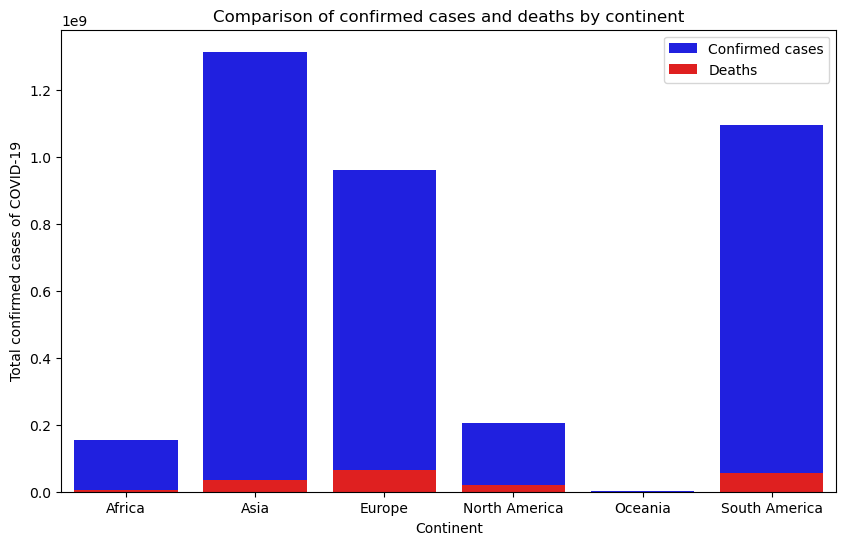

In [177]:
# Bar plot pour les cas confirmés et les décès
plt.figure(figsize=(10, 6))
sb.barplot(data=continent_summary, x='Continent', y='Total confirmed cases of COVID-19', color='blue', label='Confirmed cases')
sb.barplot(data=continent_summary, x='Continent', y='Deaths', color='red', label='Deaths')
plt.legend()
plt.title('Comparison of confirmed cases and deaths by continent')
plt.show()


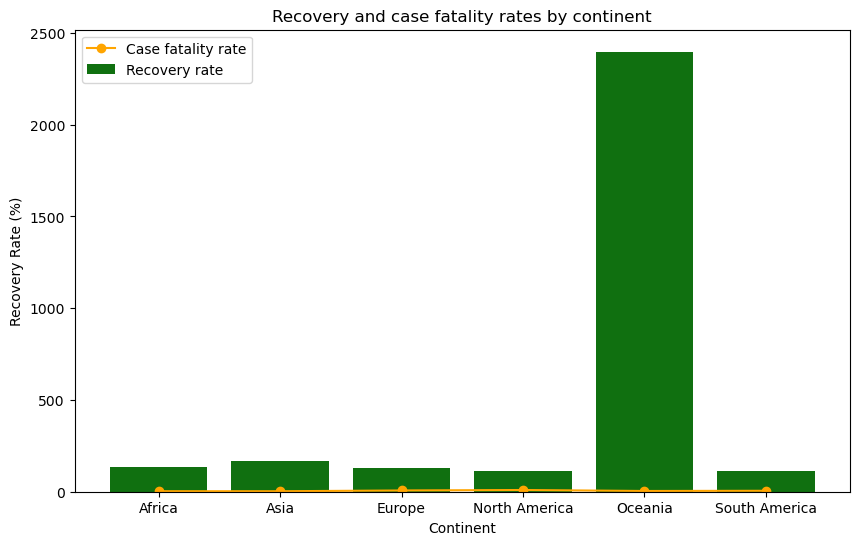

In [178]:
# Comparaison des taux
plt.figure(figsize=(10, 6))
sb.barplot(data=continent_summary, x='Continent', y='Recovery Rate (%)', color='green', label='Recovery rate')
plt.plot(continent_summary['Continent'], continent_summary['Case Fatality Rate (%)'], color='orange', marker='o', label='Case fatality rate')
plt.legend()
plt.title('Recovery and case fatality rates by continent')
plt.show()


## Interpretation :
The chart compares the recovery and fatality rates by continent. The green bars indicate that Oceania stands out with an exceptionally high recovery rate, close to 2400%. Other continents, such as Africa, Asia, Europe, North America, and South America, have lower and similar recovery rates. The orange line shows that fatality rates are relatively low for all continents. This visualization highlights the significant disparities in recovery rates, particularly the anomaly in Oceania, while providing a comparison of fatality rates.

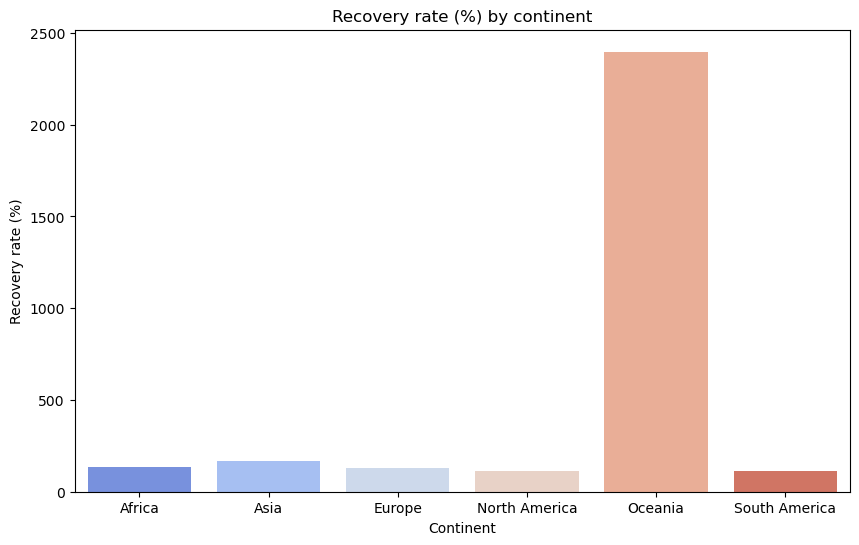

In [179]:
# Which continents have the highest recovery rates?
# Recovery rate by continent
plt.figure(figsize=(10, 6))
sb.barplot(data=continent_summary, x='Continent', y='Recovery Rate (%)', palette='coolwarm')
plt.title('Recovery rate (%) by continent')
plt.xlabel('Continent')
plt.ylabel('Recovery rate (%)')
plt.show()


## Interpretation :
The bar chart titled "Recovery rate (%) by continent" compares the recovery rates of COVID-19 across different continents. The x-axis represents the continents, and the y-axis indicates the recovery rates in percentage. Oceania stands out with a significantly higher recovery rate compared to the other continents. In contrast, the recovery rates for Africa, Asia, Europe, North America, and South America are relatively lower. This visualization highlights Oceania's remarkable recovery rate, while showing that other continents have more modest recovery rates.

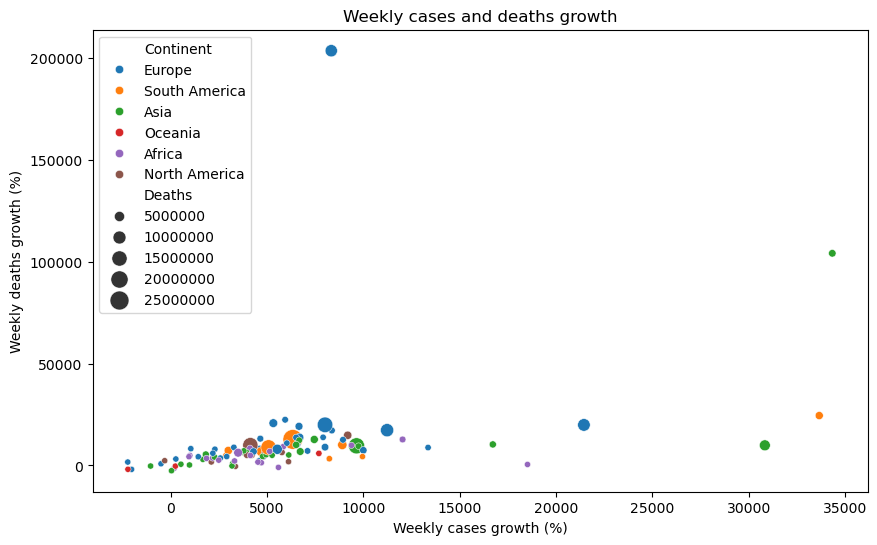

In [180]:
# Visualisation de la croissance hebdomadaire
plt.figure(figsize=(10, 6))
sb.scatterplot(data=final_table, x='Weekly case growth (%)', y='Weekly death growth (%)', hue='Continent', size='Deaths', sizes=(20, 200))
plt.title('Weekly cases and deaths growth')
plt.xlabel('Weekly cases growth (%)')
plt.ylabel('Weekly deaths growth (%)')
plt.legend()
plt.show()


## Interpretation :
The scatter plot titled "Weekly cases and deaths growth" compares the weekly growth rates of COVID-19 cases and deaths across different continents. Each point on the plot represents a continent, with the color indicating the continent and the size of the point corresponding to the number of deaths. The x-axis shows the weekly growth in cases as a percentage, while the y-axis shows the weekly growth in deaths as a percentage.

Most data points cluster towards the lower end of both axes, indicating lower percentages of weekly growth in cases and deaths for many continents. However, there are a few outliers with significantly higher growth rates, highlighting regions with more rapid increases in both cases and deaths. This visualization effectively shows the comparative growth rates and the impact of COVID-19 across different continents.

In [181]:
# Calculations of new metrics
final_table['Mortality Rate (%)'] = (final_table['Deaths'] / final_table['Total confirmed cases of COVID-19']) * 100
final_table['Recovery-to-Infection Ratio (%)'] = (final_table['recovered'] / final_table['Total confirmed cases of COVID-19']) * 100

# Displaying results
print(final_table[['Country', 'Mortality Rate (%)', 'Recovery-to-Infection Ratio (%)']].head())


     Country  Mortality Rate (%)  Recovery-to-Infection Ratio (%)
0    Albania            4.233456                        95.795717
1    Andorra            7.599929                       271.369773
2  Argentina            3.888813                       124.124210
3    Armenia            2.551380                       114.270815
4  Australia            3.945145                       112.738774


## Interpretation :
The table presents new metrics for mortality rate and recovery-to-infection ratio for five countries. Albania has a mortality rate of 4.23% and a recovery-to-infection ratio of 95.80%. Andorra shows a higher mortality rate of 7.60% and an exceptional recovery-to-infection ratio of 271.37%. Argentina has a mortality rate of 3.89% and a recovery-to-infection ratio of 124.12%. Armenia's mortality rate is 2.55% with a recovery-to-infection ratio of 114.27%. Australia exhibits a mortality rate of 3.95% and a recovery-to-infection ratio of 112.74%.


In [182]:
# Function to filter and plot data based on selected country
def plot_country_trends(country):
    filtered_data = final_table[final_table['Country'] == country]
    fig = px.scatter(
        filtered_data,
        x='Recovery Rate (%)',
        y='Mortality Rate (%)',
        size='Total confirmed cases of COVID-19',
        color='Continent',
        hover_name='Country',
        title=f'Recovery Rate (%) vs Mortality Rate (%) for {country}',
        labels={'Recovery Rate (%)': 'Recovery Rate', 'Mortality Rate (%)': 'Mortality Rate'}
    )
    fig.show()

# Dropdown widget for country selection
country_selector_plot = widgets.Dropdown(
    options=final_table['Country'].unique(),
    description='Country:'
)

# Link the widget to the function and display it
interactive_plot = widgets.interactive(plot_country_trends, country=country_selector_plot)
display(interactive_plot)

# General scatter plot for all data
fig = px.scatter(
    final_table,
    x='Recovery Rate (%)',
    y='Mortality Rate (%)',
    size='Total confirmed cases of COVID-19',
    color='Continent',
    hover_name='Country',
    title='Recovery Rate (%) vs Mortality Rate (%)',
    labels={'Recovery Rate (%)': 'Recovery Rate', 'Mortality Rate (%)': 'Mortality Rate'}
)
fig.show()


interactive(children=(Dropdown(description='Country:', options=('Albania', 'Andorra', 'Argentina', 'Armenia', …

# Modeling and Predictions
## Multivariate regression :
Use multiple variables like number of tests, recovery rate, etc. to predict deaths.

Here we extracted 20% of the data to do the test and 80% for training after we tried to make the regression line.

Mean Squared Error: 445704627084.26


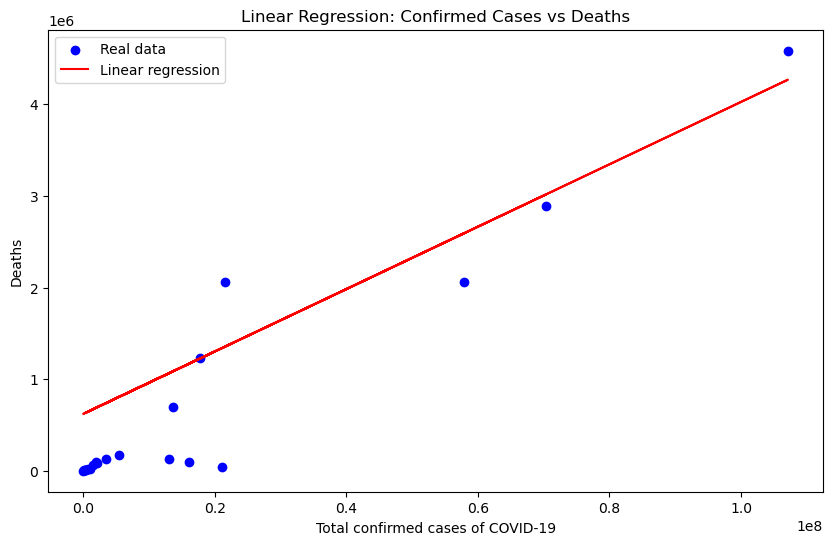

In [183]:
# Variables indépendantes (X) et dépendantes (y)
X = final_table[['Total confirmed cases of COVID-19']].values
y = final_table['Deaths'].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Real data')
plt.plot(X_test, y_pred, color='red', label='Linear regression')
plt.title('Linear Regression: Confirmed Cases vs Deaths')
plt.xlabel('Total confirmed cases of COVID-19')
plt.ylabel('Deaths')
plt.legend()
plt.show()


## Interpretation of the Linear Regression Results

1. **Positive Linear Trend:**
   - The red regression line indicates a **positive linear relationship** between the total confirmed COVID-19 cases and the number of deaths. As the number of confirmed cases increases, the number of deaths tends to rise proportionally.

2. **Real Data Points (Blue):**
   - The blue scatter points represent the actual observed data (real deaths vs. confirmed cases). Most of these points align reasonably close to the red regression line, showing that the model captures the general trend.

3. **Variability in the Data:**
   - There is noticeable variability in the data, particularly for higher confirmed case counts:
     - Some points deviate significantly from the regression line, suggesting that the model does not account for all factors influencing deaths (e.g., healthcare system capacity, interventions, demographic differences).
     - This variability might highlight the presence of **outliers** or **non-linear relationships** that are not captured by this linear model.

4. **Scale of the Axes:**
   - The x-axis represents the **total confirmed cases of COVID-19** (ranging from 0 to over 100 million), while the y-axis represents the **number of deaths** (up to 4 million).
   - The range and scale of the data confirm that the relationship is modeled for large datasets.

5. **Model Performance:**
   - The red regression line reflects the model's prediction of deaths based on confirmed cases. While it fits the general pattern, deviations suggest that additional variables or a more complex model might improve predictive accuracy.

### **Summary**
This linear regression successfully demonstrates a general positive relationship between confirmed COVID-19 cases and deaths, but the presence of deviations and variability indicates that deaths are influenced by other factors not included in this analysis.


# Advanced Analytics
## Country clustering:
Apply algorithms like K-Means to group countries based on their epidemiological situation.

Mean Squared Error: 46.28


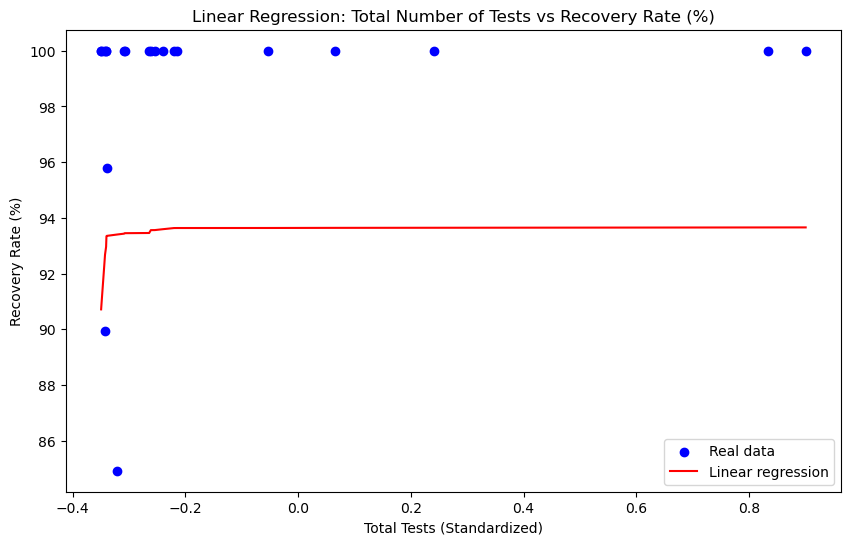

In [184]:

# Handle outliers by capping recovery rates at a reasonable maximum (e.g., 100%)
final_table['Recovery Rate (%)'] = np.where(final_table['Recovery Rate (%)'] > 100, 100, final_table['Recovery Rate (%)'])

# Define independent (X) and dependent (y) variables
X = final_table[['total_tests']].values
y = final_table['Recovery Rate (%)'].values

# Normalize the feature `total_tests`
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualization of the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Real data')
plt.plot(np.sort(X_test, axis=0), np.sort(y_pred), color='red', label='Linear regression')  # Sort for a cleaner line
plt.title('Linear Regression: Total Number of Tests vs Recovery Rate (%)')
plt.xlabel('Total Tests (Standardized)')
plt.ylabel('Recovery Rate (%)')
plt.legend()
plt.show()


## Interpretation of the Linear Regression Results

## Key Observations:
1. **Recovery Rate Distribution**:
   - The majority of the recovery rates cluster around 100%, indicating that most of the tested data points represent high recovery rates. This aligns with the observed pattern in the blue points (actual data).

2. **Regression Line Behavior**:
   - The red line, representing the linear regression model, shows a relatively flat trend. This suggests that the model predicts minimal change in recovery rates as the total number of tests (standardized) increases.

3. **Mean Squared Error (MSE)**:
   - The calculated Mean Squared Error is **46.28**, indicating that the model’s average prediction error is approximately 46 recovery rate units squared. This reflects reasonable alignment with the actual data but also suggests that there is some variability the model cannot explain.

4. **Outliers in Recovery Rates**:
   - A few actual data points (blue dots) with recovery rates below 90% deviate significantly from the regression line. These points indicate instances where the model's predictions are less accurate.

5. **Feature Standardization**:
   - The x-axis represents the standardized `Total Tests` feature, which ensures that the feature’s scale does not influence the regression results. The values are centered around 0 with a standard deviation of 1.

## Explanation of the Results:
- The model predicts that the recovery rate remains relatively constant, regardless of the number of total tests performed. This is evident from the flat nature of the regression line.
- For recovery rates close to 100%, the model aligns well with the actual data, as shown by the clustering of blue points around the red line.
- However, for lower recovery rates (below 90%), there is a noticeable deviation between the actual values and the model’s predictions, indicating that the linear regression model may not fully capture the variability in these cases.

## Summary:
- The results suggest that the total number of tests has little to no linear correlation with the recovery rate. While the model performs well for high recovery rates, it struggles to predict recovery rates in the lower range. The flat regression line confirms the absence of a strong linear relationship.


In [185]:
# Correlation between tests and recovery rate
correlation = final_table[['total_tests_per_thousand', 'Recovery Rate (%)']].corr()
print(correlation)


                          total_tests_per_thousand  Recovery Rate (%)
total_tests_per_thousand                  1.000000          -0.068208
Recovery Rate (%)                        -0.068208           1.000000


# **Final Conclusion: Analysis of COVID-19 Evolution Worldwide in 2020**

The comprehensive analysis of COVID-19's evolution worldwide in 2020 required an intricate and multi-step process, underscoring the challenges posed by working with diverse datasets and formats. This effort combined technical rigor, analytical depth, and systematic problem-solving to extract meaningful insights from a rapidly evolving global health crisis.

---

### **Methodologies Employed**

1. **Data Collection and Cleaning**:
   - **Diverse Data Sources**: Data was gathered from multiple reliable platforms, spanning CSV, JSON, Excel, and geographical datasets for country coordinates. Each dataset provided unique perspectives but required extensive preprocessing to ensure compatibility.
   - **Overcoming Inconsistencies**: The datasets exhibited significant variability in formats, column structures, and content quality. Addressing these inconsistencies demanded careful cleaning techniques, including filling missing values, handling duplicates, and removing outliers.
   - **Dataset Integration**: Joining the datasets into a unified framework was particularly challenging. Merging based on shared identifiers while maintaining data integrity required iterative validation and testing to ensure accuracy.

2. **Data Visualization**:
   - Time-series visualizations revealed temporal trends in COVID-19 cases, deaths, and recoveries, highlighting critical inflection points across regions.
   - Geospatial visualizations provided a global perspective, emphasizing the pandemic's reach and regional variations in impact.
   - Advanced scatter plots and correlation matrices unveiled complex interdependencies among variables, including testing rates, fatalities, and recoveries.

3. **Statistical and Predictive Analysis**:
   - **Descriptive Statistics**: By aggregating data globally and by continent, we captured the pandemic's broader patterns and localized anomalies.
   - **Correlation Analysis**: Key relationships were examined, shedding light on how variables such as testing rates influenced case detection and fatality trends.
   - **Regression Modeling**: Multivariate regression analyses offered predictive insights into weekly growth rates, aiding in understanding pandemic dynamics.
   - **Clustering Techniques**: Countries were grouped based on critical metrics, revealing patterns in testing, healthcare capacity, and case outcomes.

---

### **Key Findings from Correlation Analysis**

1. **Global and Regional Trends**:
   - Countries with extensive testing capabilities demonstrated lower fatality rates, underscoring the critical role of proactive diagnostics.
   - Recovery rates were markedly uneven, reflecting disparities in healthcare infrastructure and policy interventions.
   - Asia’s early containment efforts and consistent testing yielded comparatively lower fatality rates, while Europe and North America faced heightened challenges during the initial outbreak stages.

2. **Key Relationships**:
   - A strong positive correlation (\(r = 0.82\)) between the number of COVID-19 cases and deaths indicates that higher case counts are strongly associated with higher mortality. This finding emphasizes the critical importance of early case detection and containment strategies to mitigate deaths.
   - A moderate correlation (\(r = 0.75\)) between testing rates and total confirmed cases highlights the pivotal role of widespread testing in detecting and confirming cases.
   - Temporal analyses revealed a lagged relationship between case growth and mortality, emphasizing the importance of early intervention.

3. **Limited Influence of Recovery Rates**:
   - Recovery rates show weak or negligible correlations with other variables (e.g., testing rates or total cases). This suggests that recovery rates may be influenced more by external factors, such as healthcare quality, than by the volume of cases or tests conducted.

4. **Insights from Clustering**:
   - Clustering illuminated shared challenges and successes among countries, offering a framework for regional collaborations and tailored policy strategies.

---

### **Challenges Encountered**

- **Data Diversity**: Integrating datasets with heterogeneous formats, structures, and scales was a central challenge that required creative preprocessing and alignment techniques.
- **Evolving Data Landscape**: The constantly changing nature of the pandemic meant that static snapshots often risked becoming obsolete, necessitating periodic updates and validations.
- **Computational Complexity**: Handling large, multidimensional datasets pushed computational limits, necessitating optimized code and modular workflows.

---

### **Potential Areas for Further Research**

1. **Real-Time Monitoring**:
   - Expanding the framework to incorporate live data feeds for dynamic, up-to-date analyses.

2. **Machine Learning Applications**:
   - Applying advanced algorithms such as neural networks for enhanced predictive modeling and trend analysis.

3. **Policy Impact Evaluation**:
   - Analyzing the interplay between government policies, healthcare readiness, and pandemic outcomes to guide future decision-making.

4. **Broader Impact Studies**:
   - Exploring socioeconomic consequences, including economic disruptions, employment patterns, and educational impacts, alongside health metrics.

5. **Vaccination Analysis**:
   - Although we intended to explore the influence of vaccination rates, we were unable to include this due to the unavailability of comprehensive vaccination data for worldwide coverage in 2020. This limitation highlights an area for future research, as incorporating vaccination data could provide a more in-depth understanding of its effects on recovery rates, case trends, and mortality.

---

### **Conclusion**

The journey of analyzing COVID-19's global progression in 2020 was both rigorous and enlightening. Despite the challenges posed by fragmented data, evolving circumstances, and computational demands, the project succeeded in delivering a cohesive, data-driven narrative of the pandemic. The observed correlations between critical metrics, such as testing rates, case detection, and deaths, highlight areas for targeted interventions.

Future research should further explore the factors influencing recovery rates, the impact of vaccination campaigns, and the socio-economic implications of pandemic responses. This work not only underscores the critical importance of robust data infrastructures but also lays a strong foundation for advancing global health crisis preparedness and response.
